In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import random
import math

# Data description 

In [22]:
indata = pd.read_csv("guns-polls.csv")

In [72]:
indata.head(30)

,Question,Start,End,Pollster,Population,Support,rsupport,dsupport,URL
0,age-21,2/20/18,2/23/18,CNN/SSRS,Registered Voters,72,61,86,http://cdn.cnn.com/cnn/2018/images/02/25/rel3a...
1,age-21,2/27/18,2/28/18,NPR/Ipsos,Adults,82,72,92,https://www.ipsos.com/en-us/npripsos-poll-majo...
2,age-21,3/1/18,3/4/18,Rasmussen,Adults,67,59,76,http://www.rasmussenreports.com/public_content...
3,age-21,2/22/18,2/26/18,Harris Interactive,Registered Voters,84,77,92,http://thehill.com/opinion/civil-rights/375993...
4,age-21,3/3/18,3/5/18,Quinnipiac,Registered Voters,78,63,93,https://poll.qu.edu/national/release-detail?Re...
5,age-21,3/4/18,3/6/18,YouGov,Registered Voters,72,65,80,https://d25d2506sfb94s.cloudfront.net/cumulus_...
6,age-21,3/1/18,3/5/18,Morning Consult,Registered Voters,76,72,86,https://morningconsult.com/wp-content/uploads/...
7,arm-teachers,2/23/18,2/25/18,YouGov/Huffpost,Registered Voters,41,69,20,http://big.assets.huffingtonpost.com/tabsHPSaf...
8,arm-teachers,2/20/18,2/23/18,CBS News,Adults,44,68,20,https://drive.google.com/file/d/0ByVu4fDHYJgVb...
9,arm-teachers,2/27/18,2/28/18,Rasmussen,Adults,43,71,24,http://www.rasmussenreports.com/public_content...


In [73]:
indata.tail(27)

,Question,Start,End,Pollster,Population,Support,rsupport,dsupport,URL
30,ban-assault-weapons,3/3/18,3/5/18,Quinnipiac,Registered Voters,61,38,88,https://poll.qu.edu/national/release-detail?Re...
31,ban-assault-weapons,3/1/18,3/5/18,Morning Consult,Registered Voters,68,41,83,https://morningconsult.com/wp-content/uploads/...
32,ban-high-capacity-magazines,2/18/18,2/20/18,YouGov,Registered Voters,67,52,82,https://d25d2506sfb94s.cloudfront.net/cumulus_...
33,ban-high-capacity-magazines,2/25/18,2/27/18,YouGov,Registered Voters,64,44,82,https://d25d2506sfb94s.cloudfront.net/cumulus_...
34,ban-high-capacity-magazines,2/15/18,2/19/18,Morning Consult,Registered Voters,69,63,82,https://morningconsult.com/wp-content/uploads/...
35,ban-high-capacity-magazines,2/20/18,2/23/18,CNN/SSRS,Registered Voters,64,48,82,http://cdn.cnn.com/cnn/2018/images/02/25/rel3a...
36,ban-high-capacity-magazines,2/27/18,2/28/18,NPR/Ipsos,Adults,73,59,88,https://www.ipsos.com/en-us/npripsos-poll-majo...
37,ban-high-capacity-magazines,3/3/18,3/5/18,Quinnipiac,Registered Voters,63,39,87,https://poll.qu.edu/national/release-detail?Re...
38,ban-high-capacity-magazines,3/1/18,3/5/18,Morning Consult,Registered Voters,71,64,84,https://morningconsult.com/wp-content/uploads/...
39,mental-health-own-gun,2/18/18,2/20/18,YouGov,Registered Voters,87,87,84,https://d25d2506sfb94s.cloudfront.net/cumulus_...


In [14]:
indata.describe()

,Support,Republican Support,Democratic Support
count,57.000000,57.000000,57.000000
mean,67.771930,59.684211,77.228070
std,16.040148,19.802740,23.659804
min,10.000000,5.000000,10.000000
25%,61.000000,43.000000,80.000000
50%,68.000000,59.000000,85.000000
75%,76.000000,76.000000,90.000000
max,97.000000,97.000000,99.000000


In [25]:
indata.shape

(57, 9)

In [26]:
indata.isnull().sum()

Question              0
Start                 0
End                   0
Pollster              0
Population            0
Support               0
Republican Support    0
Democratic Support    0
URL                   0
dtype: int64

In [27]:
indata[indata.duplicated()]

,Question,Start,End,Pollster,Population,Support,Republican Support,Democratic Support,URL


In [48]:
indata.rename(columns=({ 'Republican Support': 'rsupport', 'Democratic Support': 'dsupport'}), inplace=True)

indata.head()

,Question,Start,End,Pollster,Population,Support,rsupport,dsupport,URL
0,age-21,2/20/18,2/23/18,CNN/SSRS,Registered Voters,72,61,86,http://cdn.cnn.com/cnn/2018/images/02/25/rel3a...
1,age-21,2/27/18,2/28/18,NPR/Ipsos,Adults,82,72,92,https://www.ipsos.com/en-us/npripsos-poll-majo...
2,age-21,3/1/18,3/4/18,Rasmussen,Adults,67,59,76,http://www.rasmussenreports.com/public_content...
3,age-21,2/22/18,2/26/18,Harris Interactive,Registered Voters,84,77,92,http://thehill.com/opinion/civil-rights/375993...
4,age-21,3/3/18,3/5/18,Quinnipiac,Registered Voters,78,63,93,https://poll.qu.edu/national/release-detail?Re...


## Data Description Answers


0.	how big is it (number of observations, variables),
There are 57 observations with 7 variables.
1.	how many numeric variables,
3 numeric variables
2.	how many categorical variables,
Population, Pollster, Question
3.	description of the variables, if available
The numeric variables are what percent of voters are in support of the question. For example, 61% of registered voters said on YouGov that they favored stricter gun laws.
4.	Are there any missing values?
No missing values
5.	Any duplicate rows?
No duplicate rows

The main part of the dataset I found fascinating was that I could change the number of rows in the dataset according to the number inside the head or the tail. Using this, I was able to read all the questions that the pollsters asked the voters.

# Descriptive Statistics and Visualization 

<AxesSubplot:ylabel='Frequency'>

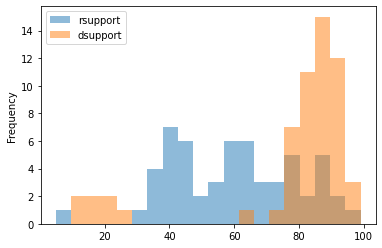

In [84]:
indata[["rsupport", "dsupport"]].plot.hist(bins=20, alpha=0.5)

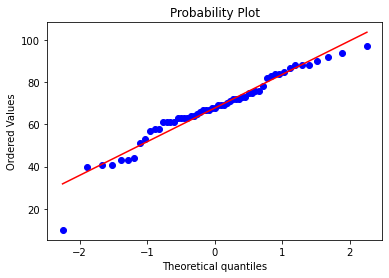

In [85]:
fig = plt.figure()
res = stats.probplot(indata["Support"], plot=plt)

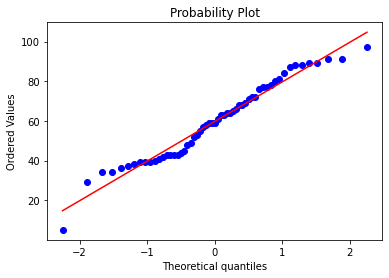

In [86]:
fig = plt.figure()
res = stats.probplot(indata["rsupport"], plot=plt)

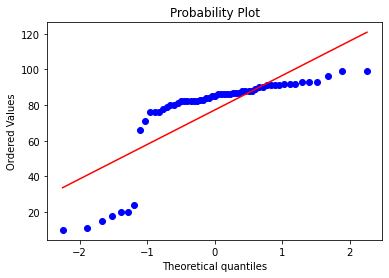

In [87]:
fig = plt.figure()
res = stats.probplot(indata["dsupport"], plot=plt)

<BarContainer object of 41 artists>

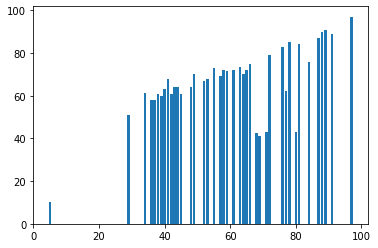

In [88]:
analyzeindata = indata.groupby(['rsupport'])['Support'].mean()
plt.bar(analyzeindata.index, analyzeindata)

<BarContainer object of 27 artists>

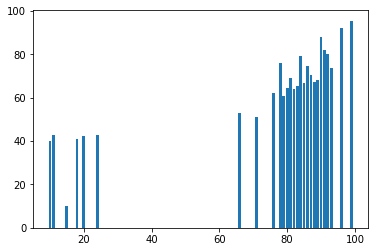

In [89]:
analyzeindata = indata.groupby(['dsupport'])['Support'].mean()
plt.bar(analyzeindata.index, analyzeindata)

## Descriptive Statistics and Visualization Answers

Looking at the histogram of the Republican and Democratic Support, the Democratic Support is mostly densely populated at the 80-100%, whereas the Republican Support is more evenly spread out. The support from both sides are vastly different in comparison with one another due to the issues at hand. The main outlier for the dataset would be the question on arming teachers with weapons. Whereas the Republican support was on the higher end, the Democratic Support was staunchly opposed to this issue and thus was isolated from the rest of the data that showed that the Democrats supported the majority of the gun policies brought up by the pollsters. 

# Hypothesis and Hypothesis Test

In [60]:
indata["rsupport"].sum()

3402

In [61]:
indata["rsupport"].mean()

59.68421052631579

In [62]:
indata["rsupport"].median()

59.0

In [63]:
indata["dsupport"].sum()

4402

In [64]:
indata["dsupport"].mean()

77.2280701754386

In [65]:
indata["dsupport"].median()

85.0

In [68]:
pd.crosstab(indata.rsupport, indata.dsupport, margins = True)

dsupport,10,11,15,18,20,24,66,71,76,78,...,87,88,89,90,91,92,93,96,99,All
rsupport,,,,,,,,,,,,,,,,,,,,,
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
36,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
39,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,3
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
obs = pd.crosstab(indata.rsupport, indata.dsupport, margins = False)

In [71]:
stats.chi2_contingency(observed = obs)

(1082.2875,
 0.1763132235977965,
 1040,
 array([[0.01754386, 0.01754386, 0.01754386, ..., 0.05263158, 0.01754386,
         0.03508772],
        [0.01754386, 0.01754386, 0.01754386, ..., 0.05263158, 0.01754386,
         0.03508772],
        [0.03508772, 0.03508772, 0.03508772, ..., 0.10526316, 0.03508772,
         0.07017544],
        ...,
        [0.03508772, 0.03508772, 0.03508772, ..., 0.10526316, 0.03508772,
         0.07017544],
        [0.03508772, 0.03508772, 0.03508772, ..., 0.10526316, 0.03508772,
         0.07017544],
        [0.01754386, 0.01754386, 0.01754386, ..., 0.05263158, 0.01754386,
         0.03508772]]))

## Hypothesis

Hypothesis will be that the Democratic and Republican support will be independent variables

## Hypothesis Test Results

The result is that the p-value in the chi^2 test of independence is bigger than 0.05, that being 0.l7. Since the test fails to reject the null hypothesis, the Democratic and Republic support percentage values are indeed independent. 

# Summary

Data is from the site https://projects.fivethirtyeight.com/guns-parkland-polling-quiz/
It is a site that lets the user guess the amount of American voters that vote for a gun policy. The data recorded is the actual data from voters that supported the policies according to various pollsters. The variables focused on in this dataset were the Republican and Democratic percentages of the polls that supported the policies brought up by the pollsters. The Republican Support was mostly spread out for the majority of the gun policies, whereas the Democratic Support percentage was consistently high up until the issue of arming teachers with guns. This was the main outlier and could be seen by the histogram for the Democrats. To summarize the findings of the dataset analysis, the Republican and Democratic Support percentages were found to be independent variables that showed to be vastly different in terms of frequency on most of the issues. This frequency reflects on what their beliefs are, especially with issues such as arming teachers with guns and having the legal age of owning a firearm at 21. 